<div style="text-align: center; background-color: #f0f0f0; padding: 15px;">
    <h1 style="color: #333;">The Effects of Greenhouse Gas Emissions on Earth's Temperature </h1>
    <h2 style="color: #666;">PROG74010 - Data Visualization Course Project</h2>
    <h3 style="color: #999;">Group 4: Jonathan Denoon, Matthew Persaud, Colin Smith</h3>
    <h4 style="color: #aaa;">April 17, 2024</h4>
</div>

<a id = '0'></a>
<h2>Table of Contents</h2>

* [Phase 1: Problem Definition, Data Collection, and Data Preparation](#1.0)
    * [Problem Definition](#1.a)
    * [Data Collection](#1.b)
    * [Data Preparation(Missing Values)](#1.c)

* [Phase 2: Exploratory Data Analysis](#2.0)
    * [Data Preparation(Outliers)](#2.a)
    * [Data Visualizations and Exploratory Analysis](#2.b)

* [Phase 3: Explanatory Data Analysis](#3.0)
    * [Data Insights](#3.a)
    * [Conclusion](#3.b)

<a id='1.0'></a>
<h2>Phase 1: Problem Definition, Data Collection, and Data Preparation</h2>
    
<p>In Phase 1, the problem definition and datasets are discussed, as well as the conduction of data preparation, to appropriately clean and prepare the data for the analysis.</p>    

<a id='1.a'></a>
<h3>Problem Definition</h3>

<p>With the rise in global temperatures across Earth, the importance in understanding the underlying causes of these rises has become increasingly crucial for studying and monitoring Earth's climate and maintainability. Among the significant contributors to these temperature rises, is emission of greenhouse gases.

This notebook aims to analyze and visualize trends, patterns, and relationships among greenhouse gas emissions and Earth's temperature. The analysis and visualization of this data will provide useful insights to help understand the impact of greenhouse gases on global warming.</p> 

<a id='1.b'></a>
<h3>Data Collection</h3>

To perform the analysis of greenhouse gas emissions and global temperatures over time, two datasets are going to be used, and loaded into DataFrames:

**International Greenhouse Gas Emissions**

The first dataset that will be used is "The Greenhouse Gas (GHG) Inventory Data". This data includes information on various different greenhouse gases emitted per a specefic time and country. The data started its recordings in 1990, and records are developed by Parties to the Convention using scientific and methodological guidance from the Intergovernmental Panel on Climate Change (IPCC). As the data is developped with reference from a climate change governmental party, biases within the data may exits, including exagerated values or missing variables of importance. 

United Nations, & Dane, S. (2017, March 23). International Greenhouse Gas Emissions. Kaggle. https://www.kaggle.com/datasets/unitednations/international-greenhouse-gas-emissions/data


**Climate Change: Earth Surface Temperature Data**

The second dataset that will be used is the "Earth Surface Temperature Data". This data includes records for the average surface temperature on different places across earth, across different dates and times. The data was originally retrieved with mercury thermometers, with records from as far as the 1700's, though with the construction of airports, weather stations exists all over the place, and data is retreived and measured with more modernized approaches and technologies. There does not seem to be obvious bias within the data or how it was collected.

Berkeley Earth, Kaggle Team, & Sissener, K. (2017). Climate Change: Earth Surface Temperature Data. Kaggle.
https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data

**Loading the Datasets**

We will load both datasets into two seperate DataFrames using the "pandas" library. The DataFrame records are then printed across all columns.

In [1]:
# Importing the necessary library
import pandas as pd

# Loading the "GlobalLandTemperaturesByMajorCity.csv" file into a DataFrame (df_temperature) (Dataset is in same folder as notebook)
df_temperature = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")

# Print all data in all columns of the DataFrame
print("GlobalLandTemperaturesByMajorCity.csv/df_temperature\n")
print(df_temperature)

# Loading the "greenhouse_gas_inventory_data_data.csv" file into a DataFrame (df_gas) (Dataset is in same folder as notebook)
df_gas = pd.read_csv("greenhouse_gas_inventory_data_data.csv")

# Print all data in all columns of the DataFrame
print("greenhouse_gas_inventory_data_data.csv/df_gas\n")
print(df_gas)

GlobalLandTemperaturesByMajorCity.csv/df_temperature

                dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1849-01-01              26.704                          1.435   
1       1849-02-01              27.434                          1.362   
2       1849-03-01              28.101                          1.612   
3       1849-04-01              26.140                          1.387   
4       1849-05-01              25.427                          1.200   
...            ...                 ...                            ...   
239172  2013-05-01              18.979                          0.807   
239173  2013-06-01              23.522                          0.647   
239174  2013-07-01              25.251                          1.042   
239175  2013-08-01              24.528                          0.840   
239176  2013-09-01                 NaN                            NaN   

           City        Country Latitude Longitude  
0       Abidjan  

<a id='1.c'></a>
<h3>Data Preparation(Missing Values)</h3>

To appropriately handle missing values, the data must be understood. To analyze data relationships showing trends over time, all data with missing date values must be dropped, as the dates within the datasets are not sorted in an ascending or descending fashion. To analyze data and draw insights based off of location, all records with missing countries must be dropped. To analyze gas category data, all missing gas types must be dropped, as it is categorical data and can not be imputed due to missing sort. 

Furthermore, analysis's that rely on temperature and/or amount of gas, missing values must be dealt with through imputation. 

**Missing Values**

To determine missing values, the sums of the required columns per each DataFrame are counted.

In [2]:
# Create variables for count to store sum of all null (missing) records in important columns amongst temperature data
missing_AverageTemperature_count = df_temperature['AverageTemperature'].isnull().sum()
missing_tDate_count = df_temperature['dt'].isnull().sum()
missing_tCountry_count = df_temperature['Country'].isnull().sum()

# Create variables for count to store sum of all null (missing) records in important columns amongst greenhouse gas data

missing_gCountry_count = df_gas['country_or_area'].isnull().sum()
missing_gDate_count = df_gas['year'].isnull().sum()
missing_gType_count = df_gas['category'].isnull().sum()
missing_gAmount_count = df_gas['value'].isnull().sum()

# Print count of missing values
print("Missing values in temperature data:")
print("AverageTemperature:", missing_AverageTemperature_count)
print("Date:", missing_tDate_count)
print("Country:", missing_tCountry_count)

print("\nMissing values in greenhouse gas data:")
print("Country:", missing_gCountry_count)
print("Year:", missing_gDate_count)
print("Category:", missing_gType_count)
print("Value:", missing_gAmount_count)


Missing values in temperature data:
AverageTemperature: 11002
Date: 0
Country: 0

Missing values in greenhouse gas data:
Country: 0
Year: 0
Category: 0
Value: 0


**Imputation**

Reviewing results, the necessary column containing missing values is the 'AverageTemperature' column in the temperature data. To handle these values, imputation must take place. The best method of imputation for the 'AverageTemperature' column is the median method. The reason why this form of imputation is the best method is from the varying outliers in the data, as countries such as Russia will have a large difference compared to Kuwait. The median will consider only the 'middle' number and not all values, which is best because this data does not have a normal distribution.

In [3]:
# Function for median imputation
def median_imputation(column):
    median_value = column.median()
    column.fillna(median_value, inplace=True)
    return column

# Create a seperate copy of DataFrame
df_fullTemperature = df_temperature.copy()

# Apply median imputation to 'AverageTemperature'
df_fullTemperature['AverageTemperature'] = median_imputation(df_fullTemperature['AverageTemperature'])

# Print original 'AverageTemperature' column
print("Original 'AverageTemperature' column in DataFrame")
print(df_temperature['AverageTemperature'])

# Print 'AverageTemperature' column after median imputation
print("\nMedian Imputation 'AverageTemperature' column in DataFrame")
print(df_fullTemperature['AverageTemperature'])

# Print count of missing value in "AverageTemperature" column after imputation
missing_AverageFullTemperature_count = df_fullTemperature['AverageTemperature'].isnull().sum()
print("AverageTemperature Missing Values:", missing_AverageFullTemperature_count)

Original 'AverageTemperature' column in DataFrame
0         26.704
1         27.434
2         28.101
3         26.140
4         25.427
           ...  
239172    18.979
239173    23.522
239174    25.251
239175    24.528
239176       NaN
Name: AverageTemperature, Length: 239177, dtype: float64

Median Imputation 'AverageTemperature' column in DataFrame
0         26.704
1         27.434
2         28.101
3         26.140
4         25.427
           ...  
239172    18.979
239173    23.522
239174    25.251
239175    24.528
239176    20.428
Name: AverageTemperature, Length: 239177, dtype: float64
AverageTemperature Missing Values: 0


<a id='2.0'></a>
<h2>Phase 2: Exploratory Data Analysis</h2>
    
<p>In Phase 2, outlier detection methods are determined, to find the outliers within the data used for analysis. Outliers and methodologies are then discussed. Exploratory analysis on the data, with visualizations, is performed to identify patterns and trends in the data, delivering insights on the relation of Greenhouse gases and Earth's temperature.</p>    

<a id='2.a'></a>
<h3>Data Preparation(Outliers)</h3>

<p>Outliers can provide us with insights, such as un-normalities in data due to a certain cause. External factors come into play, as Earth's temperature is affacted by many factors, though outliers within this scope, can provide spikes in data in which can be analyzed, determining any corelations or relevant reasonings between the datasets.</p> 

<p>To determine the outliers, two different appraoches per each necessary variable in the data is computed, using "numpy", and "scipy.stats zscore". After computing the outliers, the results are than plotted, to visualize outliers for analysis, using "matplotlib.pyplot". After reviewing the results, outliers are discussed. </p>

**Z-Score Method**

<p>The first outlier detection method used will be the Z-Score approach: </p>

In [4]:
# Importing the necessary libraries
import numpy as nm
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [5]:
# Determining the Outliers
zscores_Temp_Amount = zscore(df_temperature['AverageTemperature'])
outlier_Temp_Amount = (zscores_Temp_Amount > 3) | (zscores_Temp_Amount < -3)
count_Temp_Outliers = outlier_Temp_Amount.sum()
print('There are', count_Temp_Outliers, 'outliers in the "AverageTemperature" column.')

There are 0 outliers in the "AverageTemperature" column.


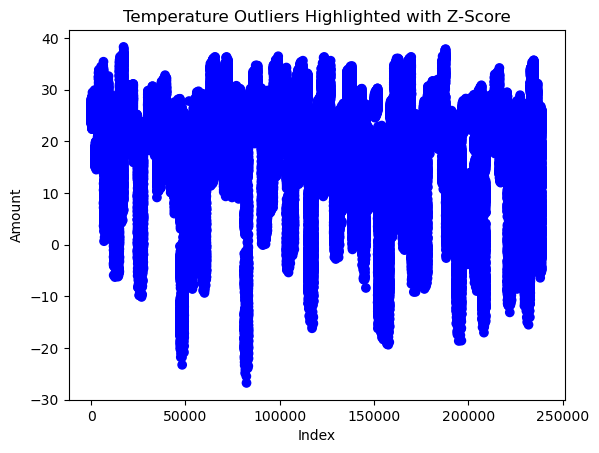

In [6]:
# Plotting the Outliers
colours = ['red' if outlier else 'blue' for outlier in outlier_Temp_Amount]

plt.scatter(df_temperature.index, df_temperature['AverageTemperature'], c=colours)

plt.title('Temperature Outliers Highlighted with Z-Score')
plt.xlabel('Index')
plt.ylabel('Amount')

plt.show()

In [7]:
# Determining the Outliers
zscores_Gas_Amount = zscore(df_gas['value'])
outlier_Gas_Amount = (zscores_Gas_Amount > 3) | (zscores_Gas_Amount < -3)
count_Gas_Outliers = outlier_Gas_Amount.sum()
print('There are', count_Gas_Outliers, 'outliers in the "value" column.')

There are 166 outliers in the "value" column.


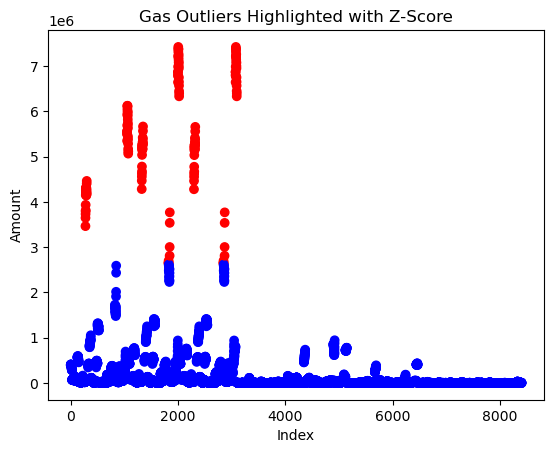

In [8]:
# Plotting the Outliers
colours = ['red' if outlier else 'blue' for outlier in outlier_Gas_Amount]

plt.scatter(df_gas.index, df_gas['value'], c=colours)

plt.title('Gas Outliers Highlighted with Z-Score')
plt.xlabel('Index')
plt.ylabel('Amount')

plt.show()

**IQR Method**

<p>The second outlier detection method used will be the IQR approach: </p>

In [9]:
# Determining the Outliers
Q1_Temp = df_temperature['AverageTemperature'].quantile(0.25)
Q3_Temp = df_temperature['AverageTemperature'].quantile(0.75)
Q1_Gas = df_gas['value'].quantile(0.25)
Q3_Gas = df_gas['value'].quantile(0.75)

# Calculate IQR
IQR_Temp = Q3_Temp - Q1_Temp
IQR_Gas = Q3_Gas - Q1_Gas

temp_Outliers_IQR = (df_temperature['AverageTemperature'] < Q1_Temp - 3 * IQR_Temp) | (df_temperature['AverageTemperature'] > Q3_Temp + 3 * IQR_Temp)
gas_Outliers_IQR = (df_gas['value'] < Q1_Gas - 3 * IQR_Gas) | (df_gas['value'] > Q3_Gas + 3 * IQR_Gas)

count_Temp_IQR_Outliers = temp_Outliers_IQR.sum()
count_Gas_IQR_outliers = gas_Outliers_IQR.sum()

print('There are', count_Temp_IQR_Outliers, 'outliers in the "AverageTemperature" column for the IQR method.')
print('There are', count_Gas_IQR_outliers, 'outliers in the "value" column for the IQR method.')

There are 0 outliers in the "AverageTemperature" column for the IQR method.
There are 1081 outliers in the "value" column for the IQR method.


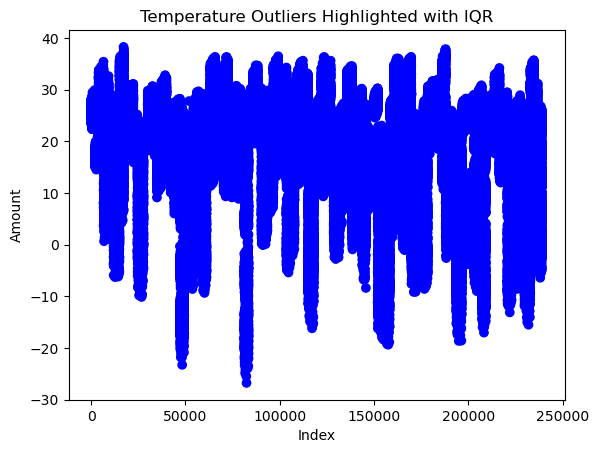

In [10]:
# Plotting the Outliers
colours = ['red' if outlier else 'blue' for outlier in temp_Outliers_IQR]

plt.scatter(df_temperature.index, df_temperature['AverageTemperature'], c=colours)

plt.title('Temperature Outliers Highlighted with IQR')
plt.xlabel('Index')
plt.ylabel('Amount')

plt.show()

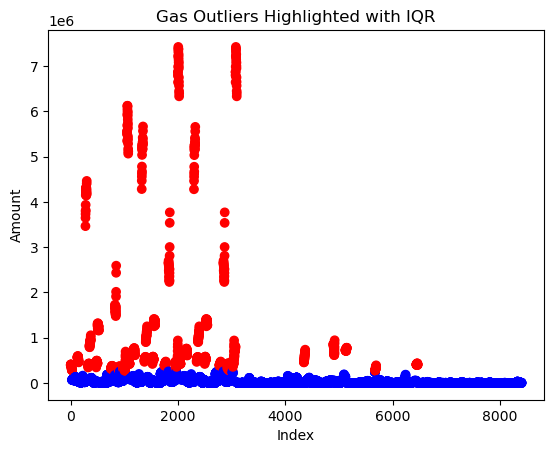

In [11]:
# Plotting the Outliers
colours = ['red' if outlier else 'blue' for outlier in gas_Outliers_IQR]

plt.scatter(df_gas.index, df_gas['value'], c=colours)

plt.title('Gas Outliers Highlighted with IQR')
plt.xlabel('Index')
plt.ylabel('Amount')

plt.show()

**Outlier Interpretation and Mitigation**

After performing both outlier detection methods, no outliers were found in the Global Land Temperatures dataframe for both detection methods.  The Greenhouse Gas dataframe had 166 and 1081 outliers found for the Z-score and the IQR method respectively.  Based on the domain of our project, we haved opted to leave these outliers in the dataset, as we believe they are critical pieces of data, as trends or patterns regarding these outliers may be present. The IQR appraoch determined more outliers, and looking at the visualizations, the IQR method has a more denselely populated and more relevant-looking blue section, giving it a more accurate analysis.

<a id='2.b'></a>
<h3>Data Visualizations and Exploratory Analysis</h3>

In this section, exploratory data analysis is conducted, with generated associated data visualizations, to uprise Correlations, trends, and insights.

**Global Greenhouse Gas Emissions Over Time**

The first area of analysis to explore, is exploring the trends of greenhouse gas emissions over time. The amount of gas emmitted per year is plotted, using a line graph, to show trends over time:

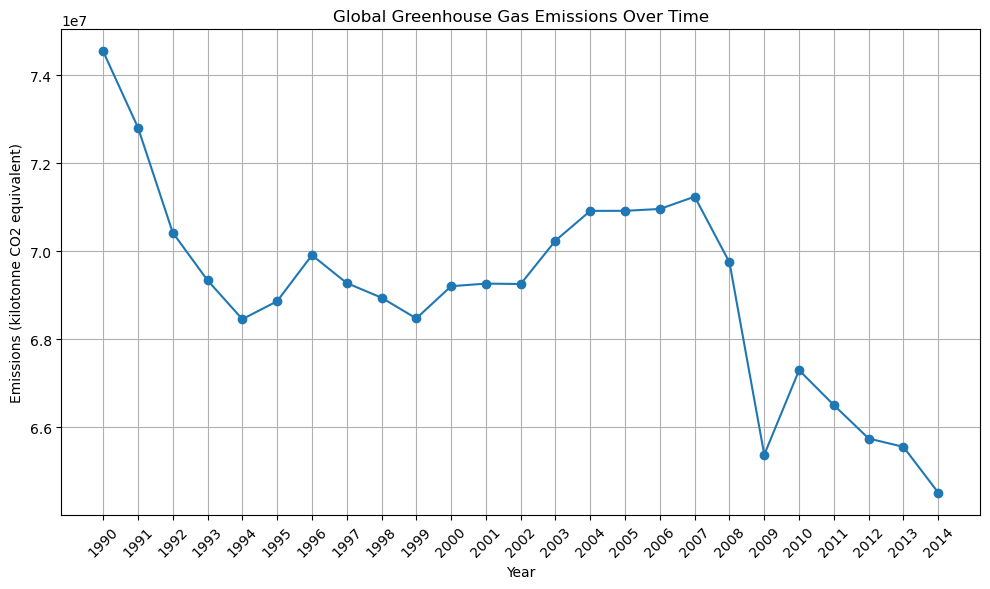

In [12]:
# Plotting the gas emissions over time
global_emissions = df_gas.groupby('year')['value'].sum()

plt.figure(figsize=(10, 6))
plt.plot(global_emissions.index, global_emissions.values, marker='o', linestyle='-')
plt.title('Global Greenhouse Gas Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Emissions (kilotonne CO2 equivalent)')
plt.grid(True)
plt.xticks(global_emissions.index, rotation=45)
plt.tight_layout()
plt.show()

**Top Countries with highest Gas Emissions Over Time**

The second area of analysis to explore, is exploring the trends of greenhouse gas emissions over time, grouped by the top 10 countries. This provides us with insights as to which countries are emitting the most gases, which will be valuebale for further analysis's. 

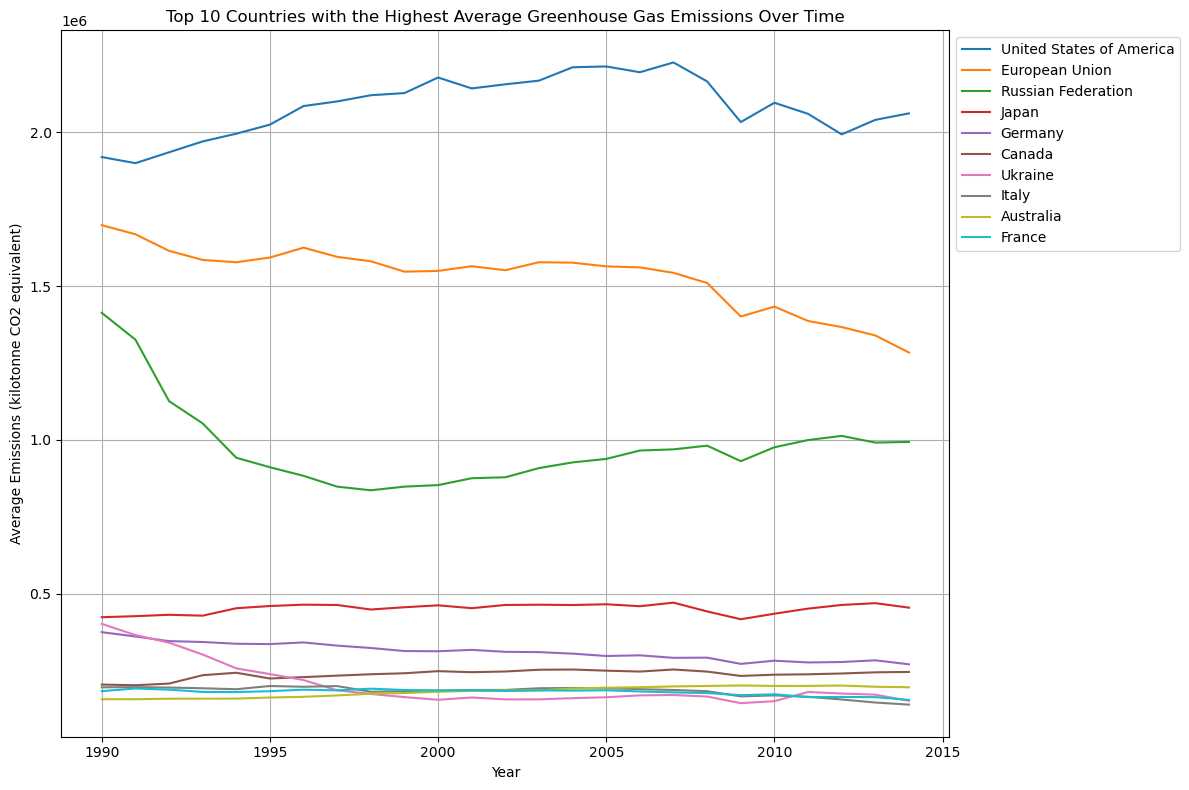

In [13]:
# Computing Averages
avg_emissions = df_gas.groupby(['country_or_area', 'year'])['value'].mean().reset_index()
total_avg_emissions = avg_emissions.groupby('country_or_area')['value'].mean()
top_countries = total_avg_emissions.nlargest(10)

plt.figure(figsize=(12, 8))
for country in top_countries.index:
    country_data = avg_emissions[avg_emissions['country_or_area'] == country]
    plt.plot(country_data['year'], country_data['value'], label=country)

# Plotting the top 10 countries with highest averages
plt.title('Top 10 Countries with the Highest Average Greenhouse Gas Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Average Emissions (kilotonne CO2 equivalent)')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**Global Temperature Change over Time**

To develop a trend to use for comparison, the third area within the data to explore, is in the temperature dataset, refering to the trend in Earth's average temperatures over time. We can use this visualization to compare to the average gas's emitted, to view any early correlations.

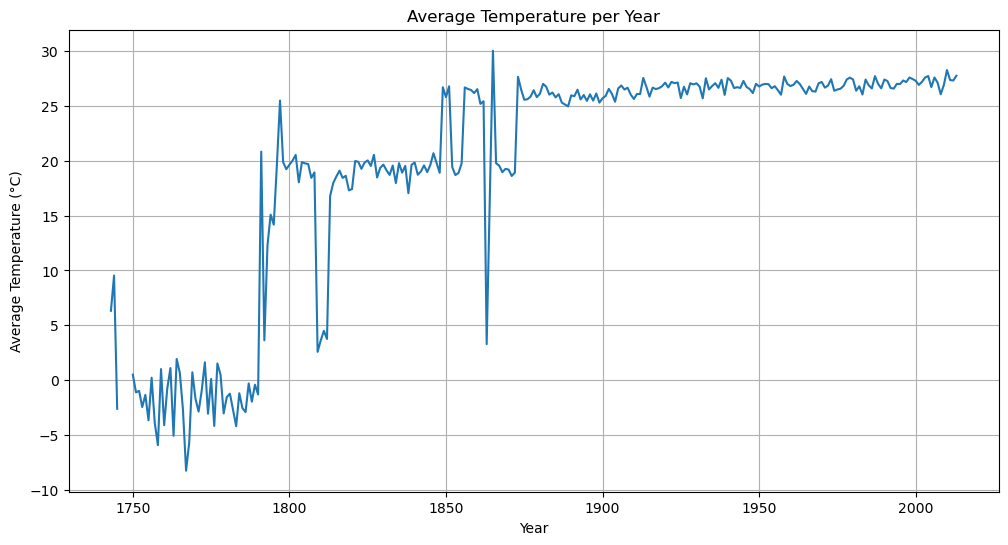

In [14]:
# Convert 'dt' column to datetime format
df_temperature['dt'] = pd.to_datetime(df_temperature['dt'])

# Extract and group the year 
df_temperature['Year'] = df_temperature['dt'].dt.year
average_temp_per_year = df_temperature.groupby('Year')['AverageTemperature'].first()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(average_temp_per_year.index, average_temp_per_year.values)
plt.title('Average Temperature per Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()

<p> Viewing the results, there seems to be a surpising correlation between gas emitted over time, and Earths temperature, as less gas has been emitted over time, though Earth's temperature has been increased. This is starting to introduce analysis that gas emissions may not be major factors regarding global warming. Lets continue with analysis..</p>

**Top 10 Hottest countries over Time**

<p>To compare the temperature of countries, with gases emitted from countries, the top 10 hottest countries over time are calculated, and visualized, to provide us with this insight.</p>

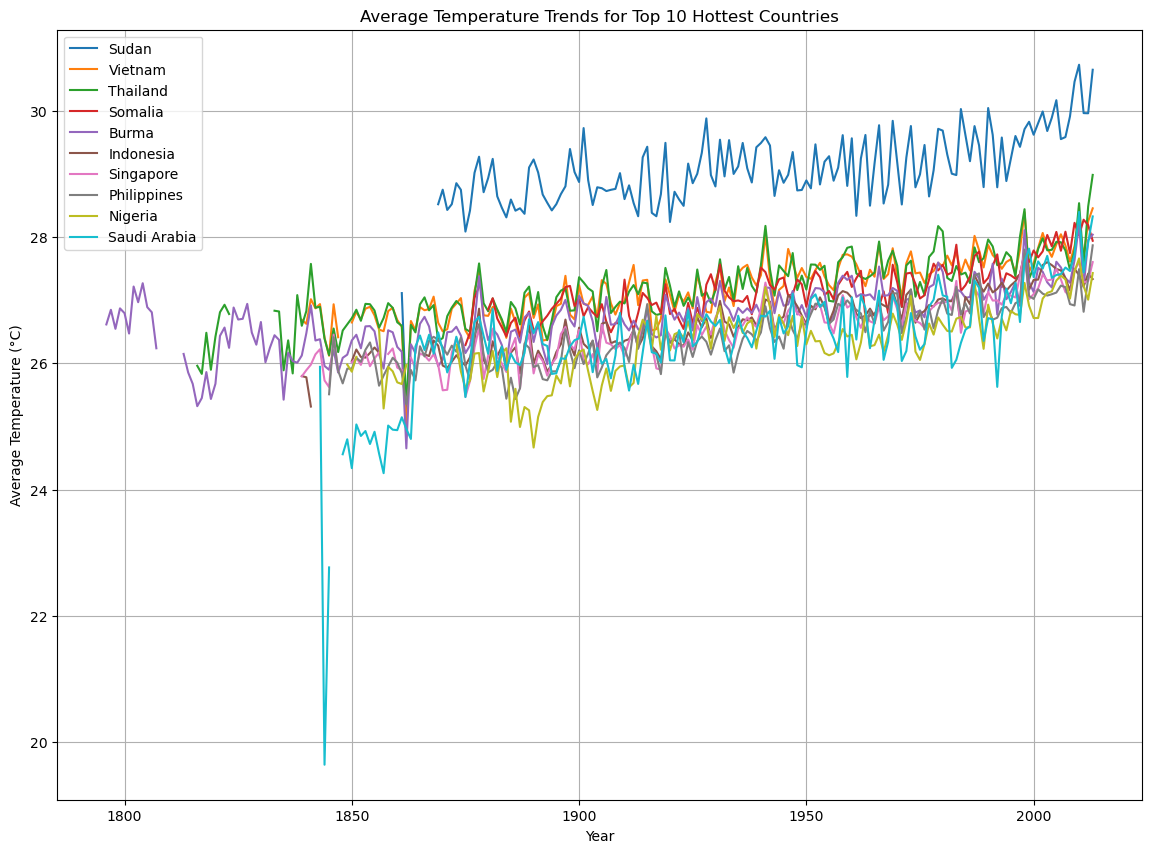

In [15]:
# Group by countries and years
average_temp_per_country_year = df_temperature.groupby(['Country', 'Year'])['AverageTemperature'].mean().reset_index()

# Filter
top_10_hottest_countries = average_temp_per_country_year.groupby('Country')['AverageTemperature'].mean().nlargest(10)
top_10_df = average_temp_per_country_year[average_temp_per_country_year['Country'].isin(top_10_hottest_countries.index)]

# Plot
plt.figure(figsize=(14, 10))

for country in top_10_hottest_countries.index:
    country_data = top_10_df[top_10_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['AverageTemperature'], label=country)

plt.title('Average Temperature Trends for Top 10 Hottest Countries')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

<p> Viewing the results, there seems to be no correlation of the hottest countries, and the countries emitting the most gas. This shows that many other factors are in play, showing gas may not me a general majorly contributing factor. Upon further Analysis, the datasets also does not contain the same countries as another though. Due to this finding and complexity, a different visualization will need to be used.. </p>

Firstly, we're going to look at a few geographical visualizations of the countries, separated by the kind of emission being measured.

In [16]:
import folium
import json
from IPython.display import IFrame

with open('world-countries.json') as data_file:
   country_geo = json.load(data_file)

countries = df_gas['country_or_area'].unique().tolist()
indicators = df_gas['category'].unique().tolist()
hist_indicator = 'greenhouse_gas'
hist_year = 2014

mask1 = df_gas['category'].str.contains(hist_indicator) 
mask2 = df_gas['year'].isin([hist_year])
# apply our mask
stage = df_gas[mask1 & mask2]
data_to_plot = stage[['country_or_area','value']]
hist_indicator = stage.iloc[0]['category']

map = folium.Map(location=[100, 0], zoom_start=1.5)
folium.Choropleth(geo_data=country_geo, data=data_to_plot,
             columns=['country_or_area', 'value'],
             key_on='properties.name',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=hist_indicator).add_to(map)

# Create Folium plot
x = map.save('plot_data.html')
IFrame(src= './plot_data.html', width=1000 ,height=450)

In [17]:
hist_indicator2 = 'carbon_dioxide_co2'
hist_year = 2014

mask3 = df_gas['category'].str.contains(hist_indicator2) 
mask4 = df_gas['year'].isin([hist_year])
# apply our mask
stage2 = df_gas[mask3 & mask4]

data_to_plot2 = stage2[['country_or_area','value']]

hist_indicator2 = stage2.iloc[0]['category']

map = folium.Map(location=[100, 0], zoom_start=1.5)
folium.Choropleth(geo_data=country_geo, data=data_to_plot2,
             columns=['country_or_area', 'value'],
             key_on='properties.name',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=hist_indicator2).add_to(map)

# Create Folium plot
x = map.save('plot_data2.html')
IFrame(src= './plot_data2.html', width=1000 ,height=450)

In [18]:
from IPython.display import display, HTML

hist_indicator3 = 'hydrofluorocarbons'
hist_year = 2014

mask5 = df_gas['category'].str.contains(hist_indicator3) 
mask6 = df_gas['year'].isin([hist_year])
# apply our mask
stage3 = df_gas[mask5 & mask6]

data_to_plot3 = stage3[['country_or_area','value']]

hist_indicator3 = stage3.iloc[0]['category']

map = folium.Map(location=[100, 0], zoom_start=1.5)
folium.Choropleth(geo_data=country_geo, data=data_to_plot3,
             columns=['country_or_area', 'value'],
             key_on='properties.name',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=hist_indicator3).add_to(map)

# Create Folium plot
x = map.save('plot_data3.html')
IFrame(src= './plot_data3.html', width=1000 ,height=450)

Now, let's look at a map indicating where the countries with the greatest average temperature increases are located.

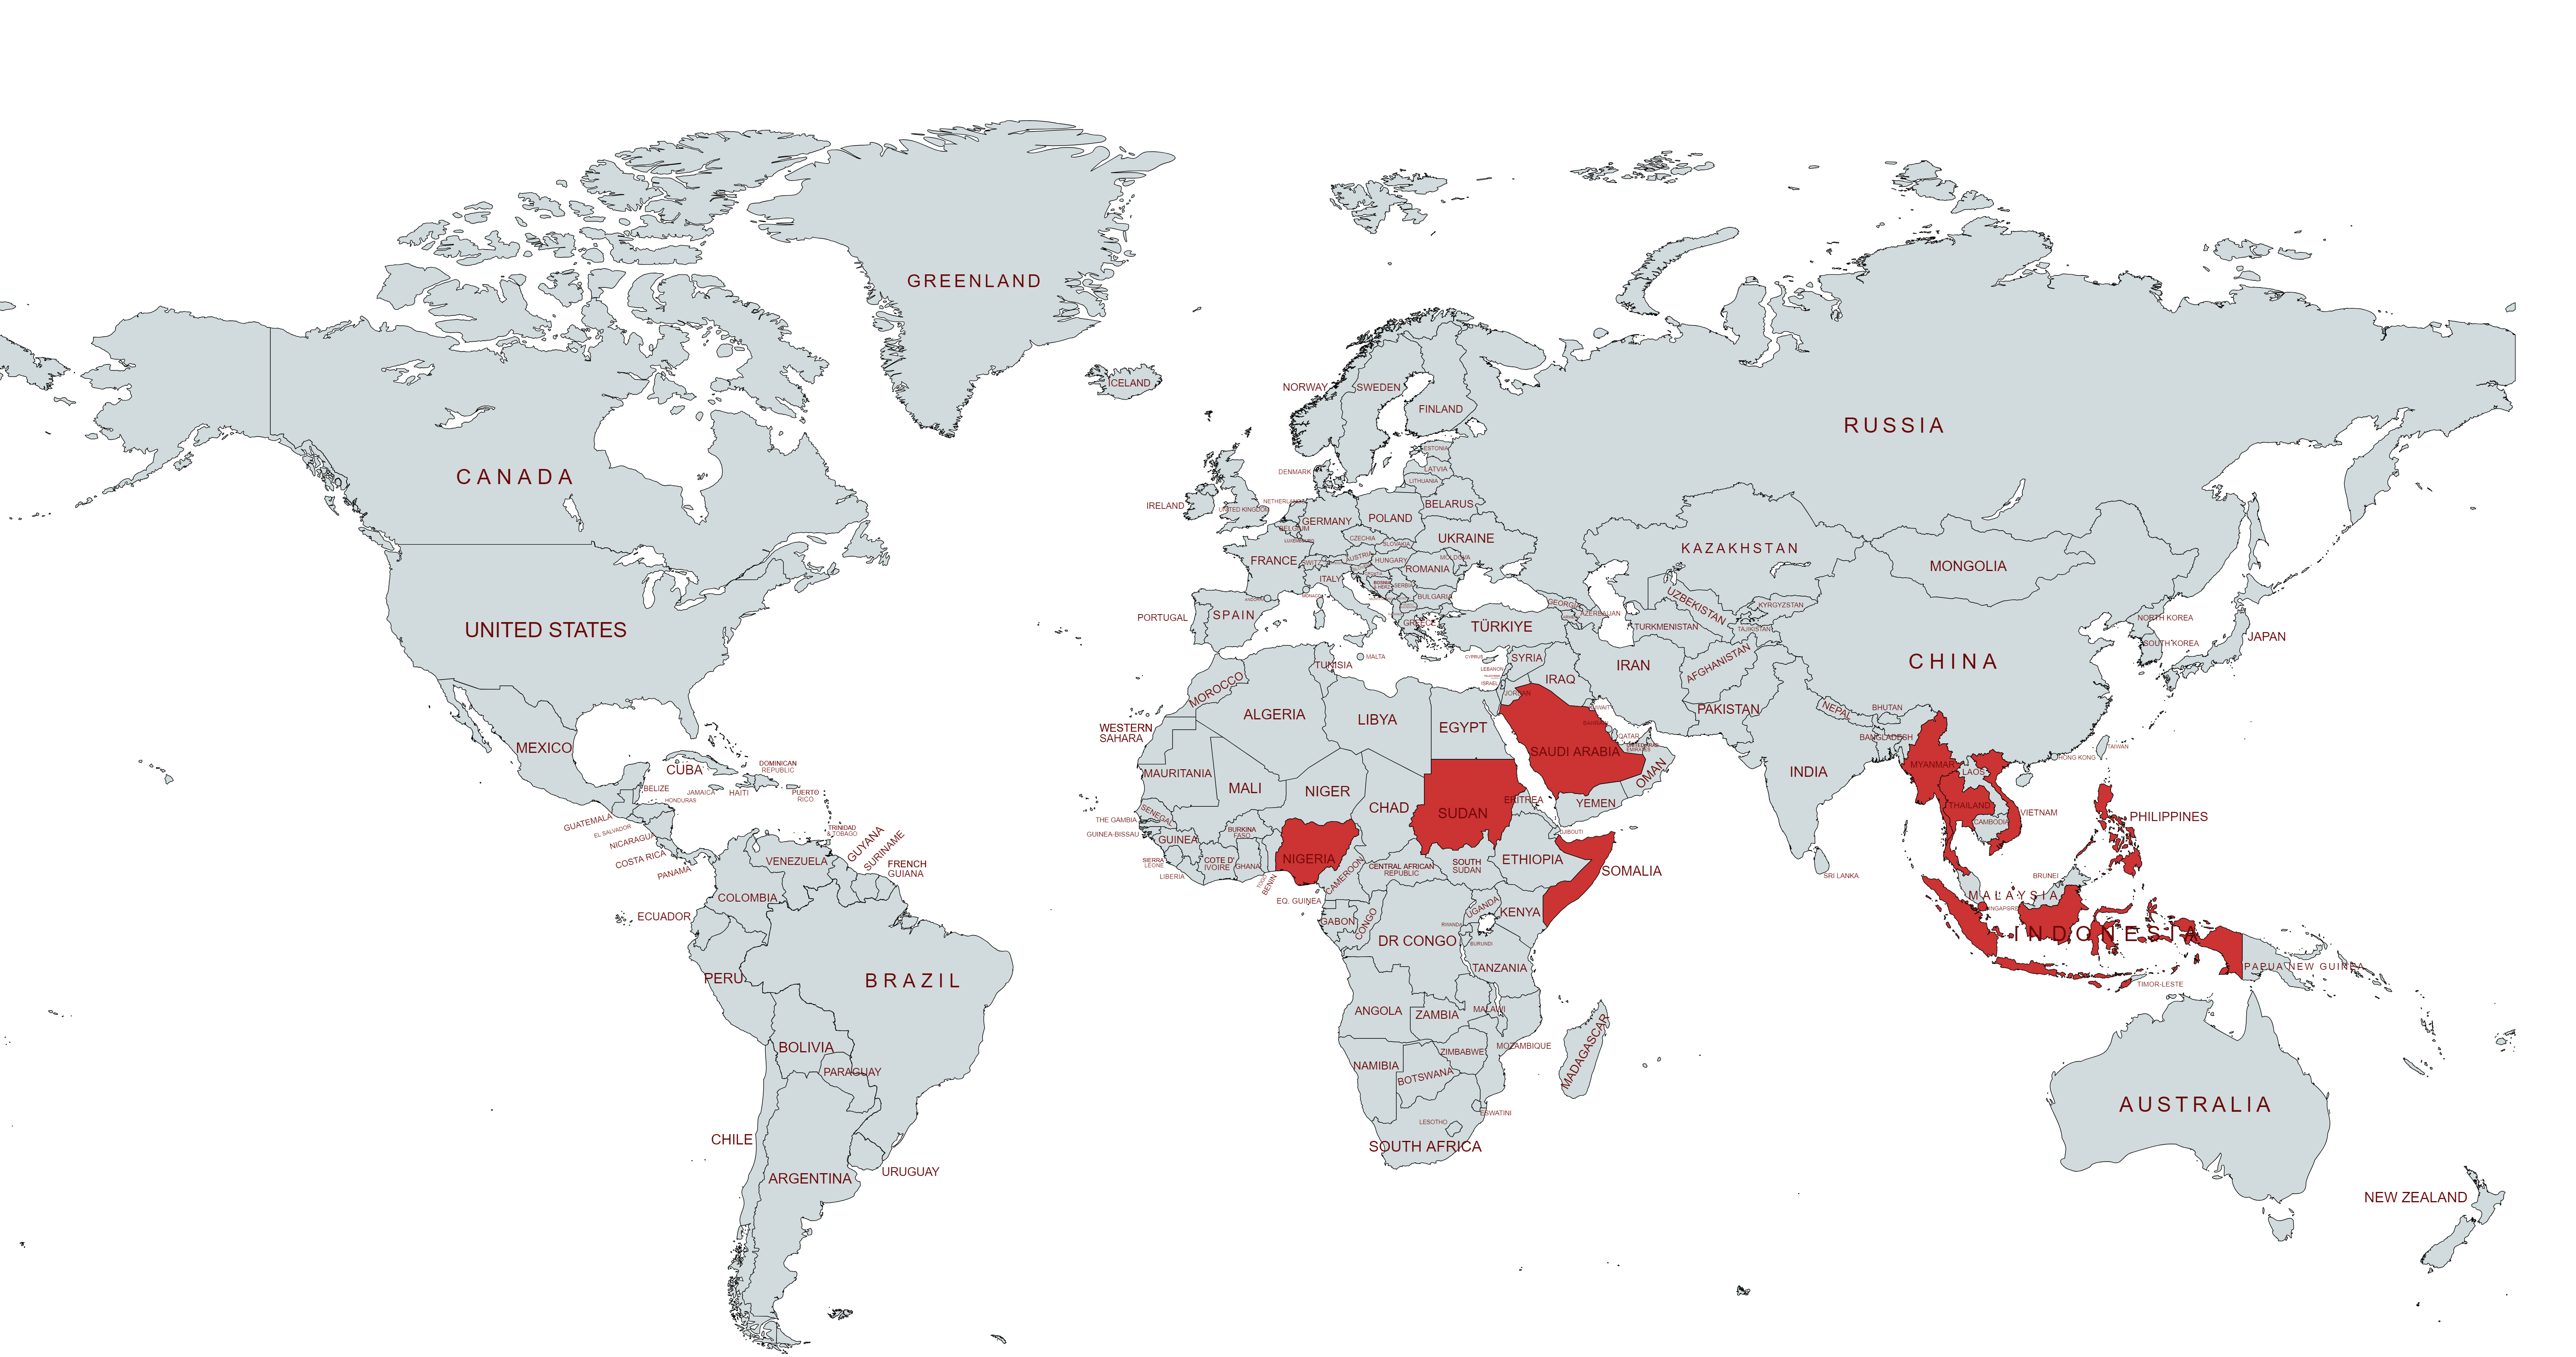

Strangely enough, though none of the countries are included in the emissions database, they are all geographically located close to each other. Without specific data on their emissions it can be difficult to be certain, but its still possible to make inferences based on the common knowledge that scientists have been sharing over the past several decades. 

With these countries grouped close together, near the equator, a possible reason for the average temperature increase being so localized despite the dispersal of the countries with the highest emissions, it may be that this temperature increase is indicative of which countries are located beneath the largest holes in the ozone layer caused by the emissions of other countries. 

To verify this, it might be worth looking into some more datasets that include data on the ozone layer, along with other datasets that might support this hypothesis, like something tracking instances of skin cancer or other hazardous effects of high UV radiation. 

<a id='3.0'></a>
<h2>Phase 3: Explanatory Data Analysis</h2>
    
<p>In this section, explanatory data analysis is performed to look into the connection between gas emissions and temperature changes. Our goal is to analyze the dataset and uncover important insights that reveal the driving forces behind climate change. In this section, we will identify key take-aways in the form of patterns, trends, and potential links within the data.</p>   

<a id='3.a'></a>
<h3>Data Insights</h3>

**Average Annual Change in Global Emissions**

In [22]:
df_gas['year'] = pd.to_numeric(df_gas['year'])

global_emissions = df_gas.groupby('year')['value'].sum()

emissions_change = global_emissions.diff()

average_change = emissions_change.mean()

average_change_rounded = round(average_change, 2)
average_change_with_units = f"{average_change_rounded:.2f} kilotonnes CO2"

print("Average change in global emissions each year:", average_change_with_units)

Average change in global emissions each year: -417988.49 kilotonnes CO2


**Average Annual Change in Global Temperature**

In [32]:
df_temperature['dt'] = pd.to_datetime(df_temperature['dt'])
df_temperature['Year'] = df_temperature['dt'].dt.year

average_temp_per_year = df_temperature.groupby('Year')['AverageTemperature'].mean()
temp_change = average_temp_per_year.diff()
average_temp_change_global = temp_change.mean()
average_temp_change_with_units = f"{average_temp_change_global:.4f}°C"

print("Average temperature change globally:", average_temp_change_with_units)

Average temperature change globally: 0.0282°C


*Based on the dataset we used*, we measured the average change in global emissions each year, showing an average annual decline of approximately **417,988.49 kilotonnes of CO2**.  This may suggest a positive trend towards reducing greenhouse gas emissions, but a weak correlation to the increase in global temperatures due to the measured average annual temperature increase of **0.0282°C**.

<a id='3.b'></a>
<h3>Conclusion</h3>

**Findings**

Based on our analysis, our findings suggest that there is ***not*** a strong correlation between gas emissions and temperature fluctuations.  Our research has provided us with valuable insight into this relationship, but it seems that further in-depth investigations are needed to determine the precise influence of gas emissions on temperature changes.  It's important to acknowledge that there are factors at play here other than just gas emissions such as season, location to equator, or even global events such as a volcano eruption.  Further isolated studies are needed to determine the influence gas emissions have on temperature as many other factors are at play. This interweaves the idea that further research when collecting data, and determining datasets, is crucial, to ensure that the datasets are comparable, with the necessary records and variables needed for an accurate comparative analysis. 


**Next Steps**

<p>When looking at the data we have available for greenhouse gas emissions and for the changing temperatures, we are missing emission data for parts of the world that make confirming our hypothesis difficult. Many potential factors are not considered with the current data, such as season, distance to the equator, or global events such as a volcanic eruption. To fix this, we need to gather more data. Firstly, to get emissions data on the countries not included in our initial dataset, which would allow us to have a stronger level of confidence. We would also need to look at a map of the holes in the ozone layer over time, as the hypothesis we produced to support our initial conclusions would rely on us being able to gather some form of data that correlates with that idea. Getting information on volcanic and other such events is less important but is still worthy of consideration.</p>

<p>To sum things up, we need to find a dataset that has better global coverage regarding emissions than our original dataset did, as there are potentially countries that have bigger emissions closer to the countries that reported the highest average temperature increase that would better explain the reason that part of the globe saw such high increases. We would also want to confirm our hypothesis regarding the ozone layer, so hard data regarding that is an important next step. Finally, we want to look at any other factors that might be relevant to the temperature readings increasing. This means that we’d need to look at how and when the recordings were made, and what factors could potentially influence those readings, such as nearby volcanic activity or any other potential sources of outliers</p>
